In [141]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Привести инверсию по каждому цветовому каналу

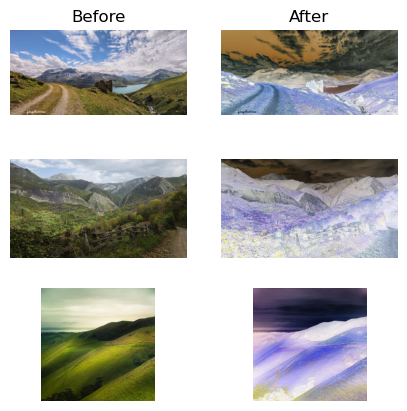

In [142]:
""""create to column before and after"""

num_img = 3

fig, ax = plt.subplots(num_img, 2, figsize = (5, 5))
ax[0,0].set_title("Before")
ax[0,1].set_title("After")

for i in range(num_img):

  img = plt.imread(f"Image{i+1}.jpg")

  reverse_img = 2 - img
  ax[i,0].imshow(img)
  ax[i,0].axis('off')

  ax[i,1].imshow(reverse_img)
  ax[i,1].axis('off')


plt.show()
     

In [143]:
#Variable	Definition	Key 
#survival	Survival	0 = No, 1 = Yes
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sex	Sex	
#Age	Age in years	
#sibsp	# of siblings / spouses aboard the Titanic	
#parch	# of parents / children aboard the Titanic	
#ticket	Ticket number	
#fare	Passenger fare	
#cabin	Cabin number	
#embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [144]:
df_train = pd.read_csv('train.csv')
df_train

df_test = pd.read_csv('test.csv')
df_test

union_df = pd.concat([df_train, df_test])
union_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [162]:
union_df.shape

(1309, 14)

In [145]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [146]:
union_df.shape

(1309, 12)

In [147]:
union_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [148]:
"""percentage of empty cells in a column"""

NAN_values = [(col, union_df[col].isna().mean()*100) for col in df_train]
NAN_values = pd.DataFrame(NAN_values, columns=['column_name', 'percent'])
NAN_values = NAN_values[NAN_values["percent"] > 0]
NAN_values.sort_values("percent", ascending=False)

,column_name,percent
10,Cabin,77.463713
1,Survived,31.932773
5,Age,20.091673
11,Embarked,0.152788
9,Fare,0.076394


In [149]:
"""how match peple survived"""

union_df[union_df['Age'].notna()].groupby(['Sex',]).agg({'Age': 'mean', 'Survived': [sum]}).reset_index()

,Sex,Age,Survived
,,mean,sum
0,female,28.687088,197.0
1,male,30.585228,93.0


In [150]:
"""Age of passenger"""

union_df[union_df['Age'].notna()].groupby(['Sex', 'Survived']).agg({'Age': [max,min, ]}).reset_index()

Sex Survived   Age      
                     max   min
0  female      0.0  57.0  2.00
1  female      1.0  63.0  0.75
2    male      0.0  74.0  1.00
3    male      1.0  80.0  0.42

In [151]:
"""mean age survived people by class"""

union_df[['Pclass', 'Survived', 'Age']].groupby(['Pclass']).mean().reset_index()

,Pclass,Survived,Age
0,1,0.629630,39.159930
1,2,0.472826,29.506705
2,3,0.242363,24.816367


In [152]:
"""average ticket price"""

union_df.groupby(["Sex", "Pclass"])["Fare"].mean().reset_index()

,Sex,Pclass,Fare
0,female,1,109.412385
1,female,2,23.234827
2,female,3,15.324250
3,male,1,69.888385
4,male,2,19.904946
5,male,3,12.415462


In [153]:
"""cut data by comma -> Surname"""

union_df['SurName'] = union_df['Name'].apply(lambda x: x.split(',')[0])
union_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurName
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware


In [154]:
union_df['Family_Size'] = union_df['SibSp'] + union_df['Parch'] + 1
union_df[(union_df['Family_Size'] > 1) & (union_df['SurName'] == 'Palsson')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurName,Family_Size
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,Palsson,5
24,25,0.0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S,Palsson,5
374,375,0.0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NaN,S,Palsson,5
567,568,0.0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,Palsson,5
389,1281,NaN,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.075,NaN,S,Palsson,5


In [155]:
"""families with more then 1 person"""

families = union_df.groupby(['SurName', 'Ticket']).filter(lambda x: len(x) > 1)
families

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurName,Family_Size
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1295,NaN,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S,Carrau,1
407,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,Widener,3
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,Peacock,3
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,Minahan,2


In [156]:
"""number of families"""

families['Family_Size'] = families['SibSp'] + families['Parch'] + 1

all_families = families[(families['Family_Size'] != 0)][['Ticket']]
count_families = all_families.groupby(['Ticket']).ngroups # cumcount

f"number of families: {count_families}"

'number of families: 176'

In [157]:
union_df.query('SurName == ["Braund"]')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurName,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,2
477,478,0.0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S,Braund,2


In [158]:
"""number of couples"""

couples = union_df[(union_df['SibSp'] == 1) & (union_df['Parch'] == 0)].groupby('SurName').filter(lambda x: 3 > len(x) > 1)
count_couples = couples.groupby(['SurName', 'Ticket']).ngroups

f"number of couples: {int(count_couples / 2)}"

'number of couples: 47'

In [159]:
"""number of P/A"""

parents_children = union_df.groupby(['SurName', 'Ticket']).filter(lambda x: max(x['Age']) - min(x['Age']) > 18)

f"number of parents with child: {len(parents_children['Ticket'].unique())}"

'number of parents with child: 79'

In [160]:
"""number of siblings"""

siblings = union_df[(union_df['SibSp'] > 0) & (union_df['Age'] < 18) & (union_df['Parch'] == 0)].groupby('Ticket').filter(lambda x: len(x) > 1)
num_siblings = len(siblings['Ticket'].unique())

f"number of siblings: {num_siblings}"

'number of siblings: 1'